<h1 style='color:#0000ec'>5 &nbsp; O método de Euler</h1>

&nbsp; Importando as bibliotecas NumPy e Matplotlib ao arquivo <b>atual</b>:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

&nbsp; Escrevendo arquivo contendo a função <i><b>sol_euler(	&lt;tempo>,	&lt;população inicial>,	&lt;modelo>)</b></i> para receber diferentes modelos:

In [2]:
%%writefile ../python/sol_euler.py
import numpy as np
from f_malthus import f_malthus
from f_verhulst import f_verhulst

def sol_euler(vt,P0,modelo):
    
    #Declarando vetor de Habitantes
    P = np.array([P0])
    
    #Obtendo passo de derivação (h)
    h = vt[2] - vt[1]

    #Aproximando P(i) pelo método de Euler segundo o modelo
    for t in vt:
        
        if modelo=='malthus':
            Pi = P[-1]+h*f_malthus(P[-1])
        elif modelo=='verhulst':
            Pi = P[-1]+h*f_verhulst(P[-1])            
        P = np.append(P,Pi)
        
    return P[0:P.shape[0]-1]


Overwriting ../python/sol_euler.py


&nbsp; Carregando o diretório <b>python/</b> que contém as funções escritas ao longo dos tópicos:

In [3]:
import sys
sys.path.insert(0, '../python')

Importando a função <b>sol_euler</b> escrita em <b>[2]</b>:

In [4]:
from sol_euler import sol_euler

<h2 style='color:#0000b7' >&nbsp; 5.1 &nbsp;Modelo de Malthus</h2>

&nbsp; Uma vez definido o método de Euler, basta declarar o passo de derivação <b>h</b>, a condição inicial <b>T0</b>, o tempo inicial <b>ti</b>, o tempo final <b>tf</b> e o intervalo de tempo <b>vt</b>:

In [5]:
h = 0.001 #Passo de derivação

P0 = 186488 #Condição inicial

ti = 0 #tempo inicial

tf = 21 #tempo final

vt = np.arange(ti,tf,h) #Intervalo de 10 à 21 anos com passo h

&nbsp; &nbsp; &nbsp; Atribuindo as variáveis aos parâmetros de <b>sol_euler</b>:

In [6]:
sol = sol_euler(vt,P0,'malthus')
print(sol)
print('O vetor de temperaturas tem {} elementos'.format(sol.shape[0]))

[186488.         186489.0443328  186490.08867145 ... 209757.00980926
 209758.18444852 209759.35909435]
O vetor de temperaturas tem 21000 elementos


&nbsp; &nbsp; &nbsp; Exibindo o gráfico <b>vt</b> $\times$ <b>P</b>:

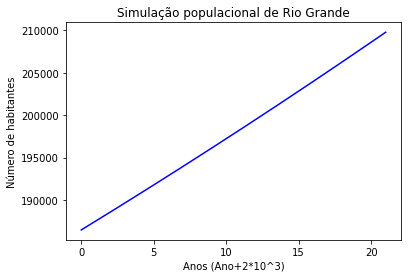

Simulação para 2021: 209759.35909434903
Simulação para 2021 (arredondado): 209759


In [7]:
plt.plot(vt,sol,'b',label='Euler')
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()

print("Simulação para 2021:",sol[sol.shape[0]-1])
print("Simulação para 2021 (arredondado):",round(sol[sol.shape[0]-1]))

<h2 style='color:#0000b7' >&nbsp; 5.2 &nbsp;Modelo de Verhulst</h2>


&nbsp; Uma vez definido o método de Euler, basta declarar o passo de derivação <b>h</b>, a condição inicial <b>T0</b>, o tempo inicial <b>ti</b>, o tempo final <b>tf</b> e o intervalo de tempo <b>vt</b>:

In [8]:
h = 0.001 #Passo de derivação

P0 = 197228 #Condição inicial

ti = 0 #tempo inicial

tf = 11 #tempo final

vt = np.arange(ti,tf,h) #Intervalo de 10 à 21 anos com passo h

In [9]:
sol = sol_euler(vt,P0,'verhulst')
print(sol)
print('O vetor de temperaturas tem {} elementos'.format(sol.shape[0]))

[197228.         197229.04988757 197230.09977    ... 208444.62163381
 208445.61012766 208446.59861552]
O vetor de temperaturas tem 11000 elementos


&nbsp; &nbsp; Gerando solução com vetor variando de 0 à 500, com o obejtivo de visualizar a assíntota horizontal em <b>P</b> = <b>L</b>

In [10]:
t_lim = np.linspace(0,500)
sol_lim = sol_euler(t_lim,P0,'verhulst')

&nbsp; &nbsp; &nbsp; &nbsp; Exibindo gráfico <b>vt</b> $\times$ <b>$P$</b>

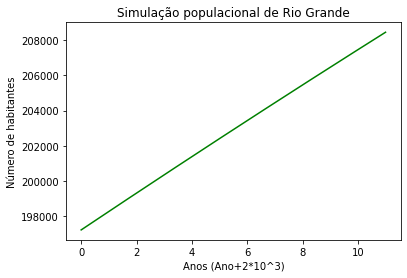

Simulação para 2021: 208446.5986155152
Simulação para 2021 (arredondado): 208447


In [11]:
plt.plot(vt,sol,"g")

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()

print("Simulação para 2021:",sol[sol.shape[0]-1])
print("Simulação para 2021 (arredondado):",round(sol[sol.shape[0]-1]))

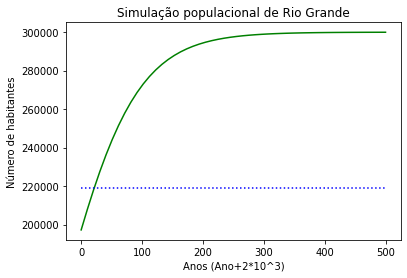

In [12]:
L = 218858 #Limite (L)

plt.plot(t_lim,sol_lim,"g") #Curva logística
plt.plot(t_lim,np.full(t_lim.shape[0], L),"b", linestyle = 'dotted') #Assíntota

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()